Here, we are going to obtained a clear image where the different classes are very identificable (poison and edible mushrooms).

In [1]:
#mount drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the neccessary modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [3]:
#Let's import the dataset
data = pd.read_csv("/content/drive/My Drive/Rinita/mushrooms.csv")

In [4]:
#Now, visualize the data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
#Let's get some more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Let's get some information about the missing values
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

We can see 30% percent stalk-root data is missing values we have to calculate it.

In [7]:
#calculating the missing values
100*len(data.loc[data['stalk-root']=='?']) / sum(data['stalk-root'].value_counts())

30.52683407188577

In [8]:
#drop the stalk-root column
data = data.drop('stalk-root', 1)

We prepare the data to be used in the neural network model:

In [9]:
Y = pd.get_dummies(data.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in data.iloc[:,1:].columns:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

Let's build our neural network now with keras!!!

In [10]:
# import the neccessary module to build neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras import backend as K
from keras.layers import BatchNormalization
seed = 123456

In [11]:
#define the ANN model
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(20, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    sgd = SGD(lr=0.01, momentum=0.7, decay=0, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
    return model

Let's train the model and generate the neccessary conclusion!!!

In [12]:
model = create_model()
history = model.fit(X.values, Y.values, validation_split=0.50, epochs=100, batch_size=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


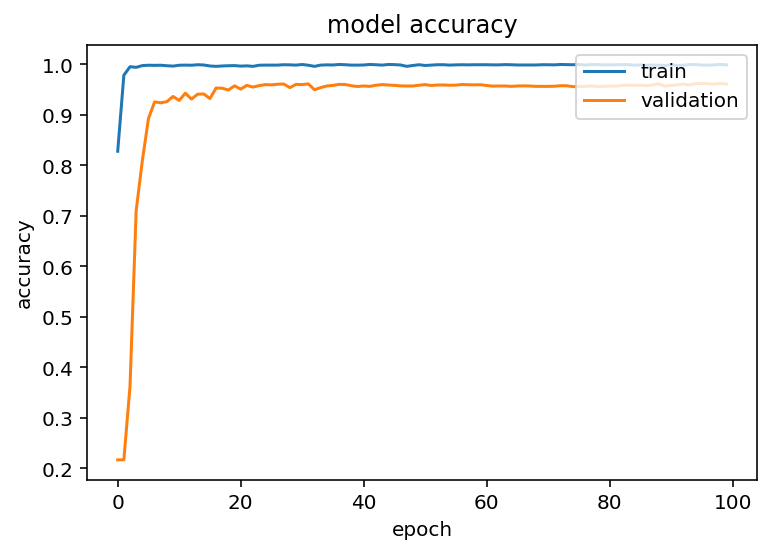

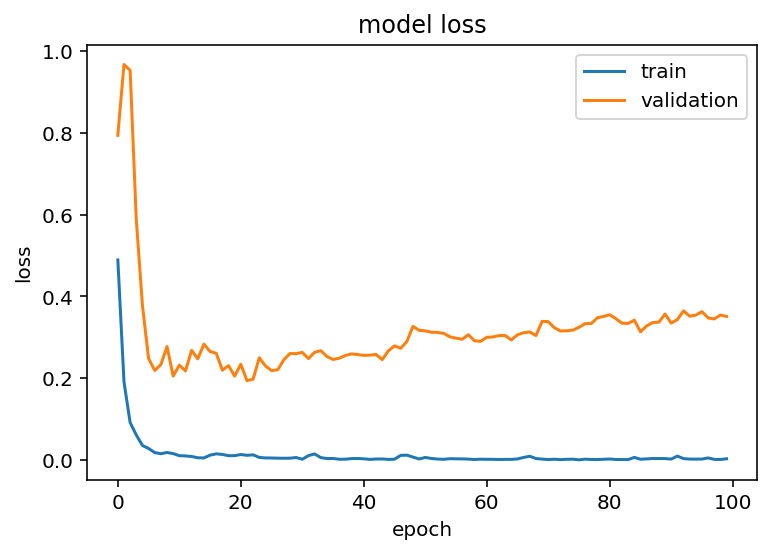

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

We have a very good accuracy although this model tens to overfit!!!

In [18]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*history.history['accuracy'][-1], 100*history.history['val_accuracy'][-1]))

Training accuracy: 99.93% / Validation accuracy: 96.11%


We are going to obtain the values of the layer previous to the output layer.

In [19]:
from keras import backend as K
import numpy as np

layer_of_interest=0
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[layer_of_interest].output])
intermediate_tensor = intermediate_tensor_function([X.iloc[0,:].values.reshape(1,-1)])[0]

In [20]:
intermediates = []
color_intermediates = []
for i in range(len(X)):
    output_class = np.argmax(Y.iloc[i,:].values)
    intermediate_tensor = intermediate_tensor_function([X.iloc[i,:].values.reshape(1,-1)])[0]
    intermediates.append(intermediate_tensor[0])
    if(output_class == 0):
        color_intermediates.append("#0000ff")
    else:
        color_intermediates.append("#ff0000")

Let's visualize the tSNE projection!!!

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
intermediates_tsne = tsne.fit_transform(intermediates)

In [22]:
#Let's see what we have
print(intermediates_tsne)

[[ 70.03056   -30.144922 ]
 [ -5.2159014  44.30745  ]
 [ -3.7561924  39.817245 ]
 ...
 [  8.293033  -18.440601 ]
 [ 77.30382    10.253936 ]
 [  7.8280654  -7.57153  ]]


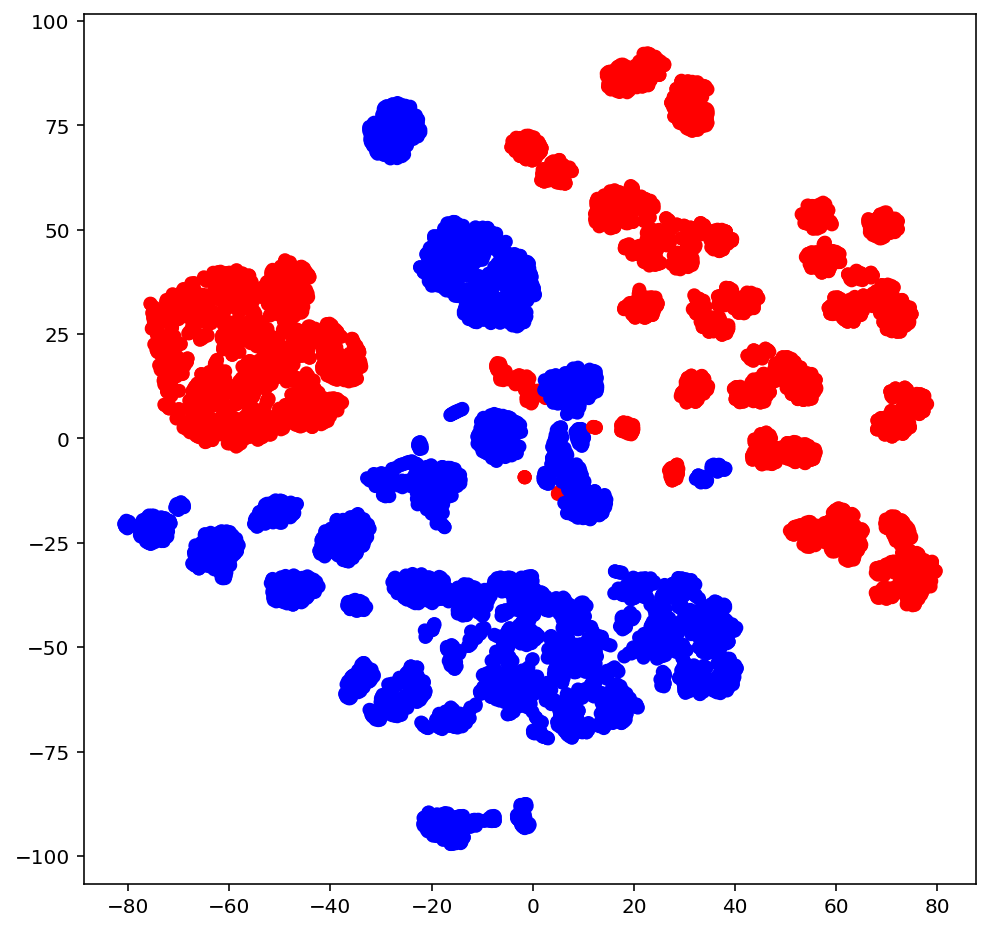

In [23]:
#understand the data with better visualization\
plt.figure(figsize=(8, 8))
plt.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], color=color_intermediates)
plt.show()

Hurrah!!!
We have done it!!!.